9.	[20 Marks] Implement a neural network version of an RL to solve the linear maze example and submit your program as jupyter notebook.       
<img src="maze_problem.PNG">

In [1]:
## Reinforcemet learning in a maze
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import linalg as LA

def tau (s,a):
    if s ==0 or s == 4: 
        return (s)
    else: 
        return (s+a)

def rho (s,a):
    return ( s==1 and a==0) + 2*( s==3 and a==1)

def calc_policy (Q) :
    policy = np.zeros(5)
    for s in range (0,5):
        uids = np.argmax(Q[s,:])
        policy[s]= 2 * uids-1
        policy[0]= policy[4]=0
    return policy.astype(int)

def idx (a):
    return ((a + 1)/2)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#initialise weights
W = tf.Variable(tf.random_uniform([5,2]))
input_vetor = tf.placeholder(shape=[1,5],dtype=tf.float32)

#find Q value
Q_out = tf.matmul(input_vetor,W)

#initialise new_Q
new_Q = tf.placeholder(shape=[1,2],dtype=tf.float32)

#prediction max Qvalue
prediction  = tf.argmax(Q_out,1)

#find the error between maxQ and placeholder.
loss = tf.reduce_sum(tf.square(new_Q - Q_out))

#make a model that minimises this loss using gradient descent.
model = tf.train.GradientDescentOptimizer(learning_rate=0.1)
optimal_model = model.minimize(loss)

In [3]:
Q_table = np.array( [[ 0.,   1.,   0.5,  0.5,  0. ], [ 0.,   0.5,  1.,   2.,   0. ]])
Qana = Q_table
init = tf.global_variables_initializer()

#learning parameters
gamma = .05
e = 0.1
epoch = 670
loss = []
alpha=0.001
with tf.Session() as sess:
    sess.run(init)
    for i in range(epoch):
        state = np.random.randint(0,5)
        for t in range(0,5):
            #find the action and Q value
            a,Q = sess.run([prediction,Q_out], feed_dict={input_vetor:np.identity(5)[state:state+1]})
            
            #choose the action greedly.
            #if np.random.rand()<0.1: a=-a #epsilon greedy
                
            #find the new state where you end up, and the reward for current state
            senv=tau(state,a[0]); r=rho(state,a[0]) # given by environment, not known to agent
            
            #find the Qvalue of the next state that you'd end up in if you take action a.
            Q1 = sess.run(Q_out,feed_dict={input_vetor:np.identity(5)[senv:senv+1]})
            
            #choose the action that gives the maximum Q_value
            Q1_max = np.max(Q1)
            
            #making a copy of Q and setting the current state to new state
            Q_updated = Q
            
            
            #update the Q value by considering the current state's reward and the estimated reward of future actions at a discounted value(e).
            Q_updated[0,a[0]] = r + gamma*Q1_max
            
            # Train it!
            sess.run([optimal_model,W],feed_dict={input_vetor:np.identity(5)[state:state+1],new_Q:Q_updated})
            state=senv
        #calculate the loss/error
        loss.append(LA.norm(tf.global_variables()[0].eval().T - Q_table))   
   
    #determine the optimal policy
    policy = calc_policy(tf.global_variables()[0].eval())
    print('Best Policy :- '+str(policy))

Best Policy :- [ 0 -1  1  1  0]


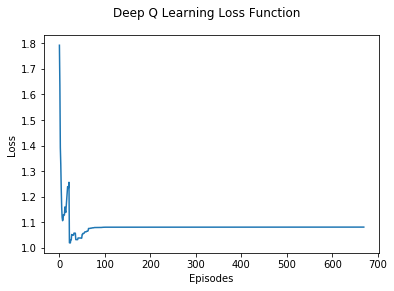

In [4]:
plt.suptitle('Deep Q Learning Loss Function')
plt.xlabel('Episodes')
plt.ylabel('Loss')
plt.plot(loss)
plt.show()
